# Plot opto condition raster + PSTH

This is currently used as figure 1 panel h, where the output figure from this code is manually inserted into Hmov_L6S_paper/figs/fig_01.ai.

## Setup

In [1]:
run -im djd.main -- --dbname=dj_hmov

Connecting write@huxley.neuro.bzm:3306
Connected to database 'dj_hmov' as 'write@10.153.173.165'


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from djd.plot import get_color_dict

# Automatically reload modules to get code changes without restarting kernel
# NOTE: Does not work for DJD tables and methods but DJD module functions
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Define example unit key
key = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 19}

## Plot locomotion state raster+PSTH for figure for Fig1

In [8]:
import matplotlib as mpl
## Update plot parameters
# Option 1: Update general pars from modified matplotlibrc file
#plt.rcParams.update(mpl.rc_params_from_file('../../matplotlibrc', fail_on_error=False, use_default_template=True))

# Option 2: Dynamically update general pars (use if not updating from modified matplotlibrc)
plt.rcParams.update({
#     'figure.dpi': 100,
    'figure.max_open_warning': 0, 
    'axes.linewidth': 0.5,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'axes.labelsize': 'medium',
    'font.sans-serif': ['Arial'],
    'pdf.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    'ps.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    })

# Dynamically update plot-specific pars
plt.rcParams.update({
#     'figure.dpi': 100,
    'figure.max_open_warning': 0, 
    'axes.labelsize': 7.0,
    'axes.titlesize': 8,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,
    'legend.fontsize': 7,
    })


**Option 1**

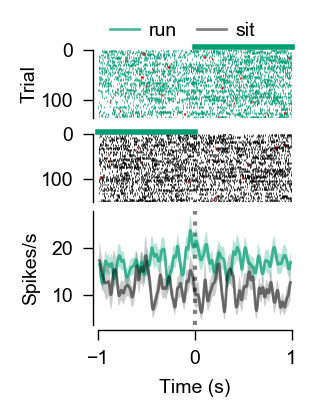

In [13]:
fig, axs = (HmovUnit() & key).plot_locomotion_raster_psth()

# Manual plot edits
axs[0][1].set_ylabel('')
axs[1].legend(['run', 'sit'], ncol=2, frameon=False, loc='lower left',
              bbox_to_anchor=(0, 2.4),
              columnspacing=1, handlelength=1.5, handletextpad=0.5,
              borderpad=0.1)

plt.savefig('./figs/locomotion_raster_psth.pdf')

# Opto raster & PSTH for this unit

hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).
hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).


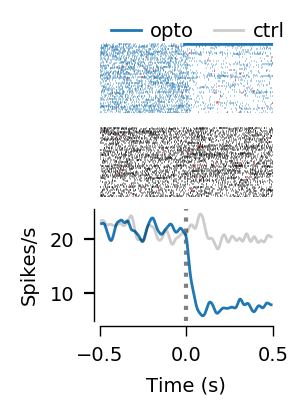

In [10]:
# Plot raster+PSTH figure
fig, axs = (HmovUnit() & key).plot_opto_cond_raster_psth(optocond=['off-on', 'off-off'], stimcond='stim',
                                                          offsets=[-0.5, -0.5], legend=False, legend_frame=False, 
                                                          linewidths=[1, 1, 1, 1], s=0.25, l=4, figsize=[3.7, 4.5], dpi=200,
                                                          hspace=0.05, hpad=0., hratios=[0.45,0.55],
                                                          eventfill=False, eventbar=True);
# Manual plot edits
for ax in axs[0]:
    ax.set_ylabel('')
axs[1].legend(['opto', 'ctrl'], ncol=2, frameon=False, loc='lower left', bbox_to_anchor=(0, 2.4),
             columnspacing=1, handlelength=1.5, handletextpad=0.5, borderpad=0.1)  # will cause constr_layout Warn but ok now
# NOTE: To accomodate manual legend, would need to adjust fig - this part is manually edited in Illustrator for now
# plt.subplots_adjust(top=0.9)
# fig.set_figheight(fig.get_figheight()+0.1)
#plt.savefig('./figs/raster_psth.pdf')